## Varying Number of Neighbors (n_neighbors)

In [1]:
# KNN Classification Experiment with Parameter Tweaks

# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 2. Load dataset (Wine classification dataset)
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [2]:
# 3. Baseline KNN with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
baseline_acc = knn.score(X_test, y_test)
print(f"Baseline accuracy: {baseline_acc:.3f}")


Baseline accuracy: 0.806


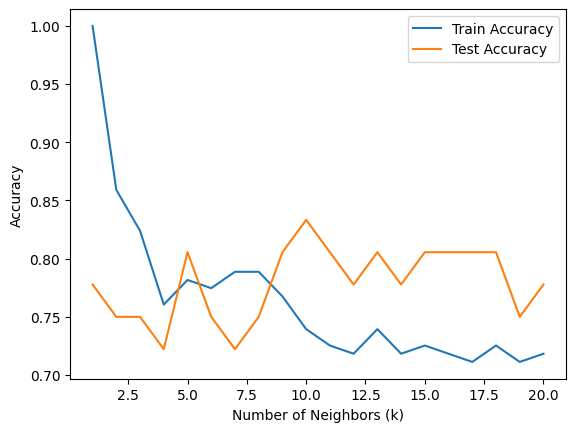

In [3]:
# 4. Compare different k values
k_values = range(1, 21)
train_acc, test_acc = [], []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(k_values, train_acc, label="Train Accuracy")
plt.plot(k_values, test_acc, label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Distance Weighting (weights)

In [4]:
# 5. Try uniform vs distance weighting
for w in ['uniform', 'distance']:
    model = KNeighborsClassifier(n_neighbors=5, weights=w)
    model.fit(X_train, y_train)
    print(f"Weights={w}, Test Accuracy={model.score(X_test, y_test):.3f}")


Weights=uniform, Test Accuracy=0.806
Weights=distance, Test Accuracy=0.806


## Distance Metric (metric)

In [5]:
# 6. Try different distance metrics
for m in ['euclidean', 'manhattan', 'minkowski']:
    model = KNeighborsClassifier(n_neighbors=5, metric=m)
    model.fit(X_train, y_train)
    print(f"Metric={m}, Test Accuracy={model.score(X_test, y_test):.3f}")


Metric=euclidean, Test Accuracy=0.806
Metric=manhattan, Test Accuracy=0.833
Metric=minkowski, Test Accuracy=0.806
